## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read, write
from ase.visualize import view
from lammps_log_reader import LogReader

In [3]:
atoms_iteration_1 = read('simulations/MD_1/dump_all.lmc', index=':')
atoms_iteration_1_2 = read('simulations/MD_1_2/dump_all.lmc', index=':')
# In the following movies it can be clearly seen that the atoms start to occupy unphysical configuration after 400ps
view(atoms_iteration_1)

<Popen: returncode: None args: ['/home/tthakur/miniconda3/envs/aiida240/bin/...>

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/tthakur/miniconda3/envs/aiida240/lib/python3.11/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/home/tthakur/miniconda3/envs/aiida240/lib/python3.11/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/home/tthakur/miniconda3/envs/aiida240/lib/python3.11/site-packages/matplotlib/pyplot.py", line 446, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tthakur/miniconda3/envs/aiida240/lib/python3.11/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/home/tthakur/miniconda3/envs/aiida240/lib/python3.11/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operation on closed file.


dict_keys(['Step', 'Temp', 'PotEng', 'TotEng', 'Press', 'c_1[1]', 'c_1[2]', 'c_1[3]', 'c_1[4]', 'c_2[1]', 'c_2[2]', 'c_2[3]', 'c_2[4]', 'c_3[1]', 'c_3[2]', 'c_3[3]', 'c_3[4]'])


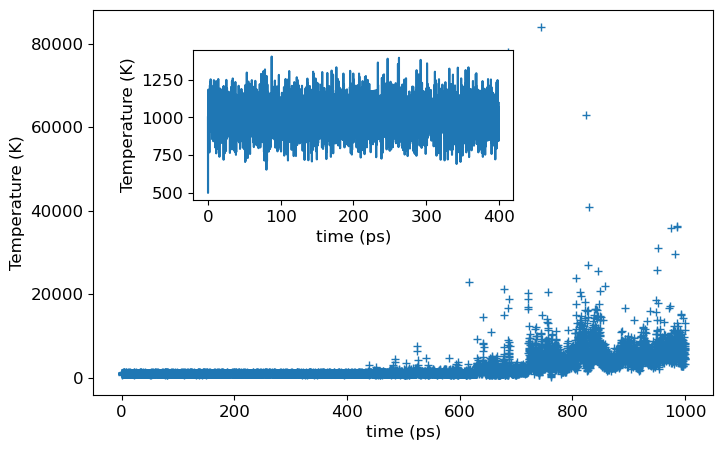

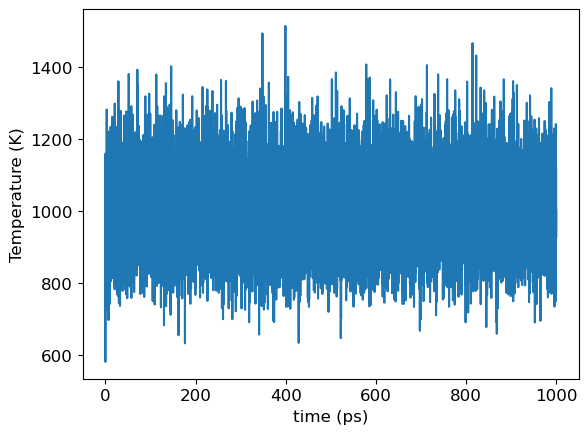

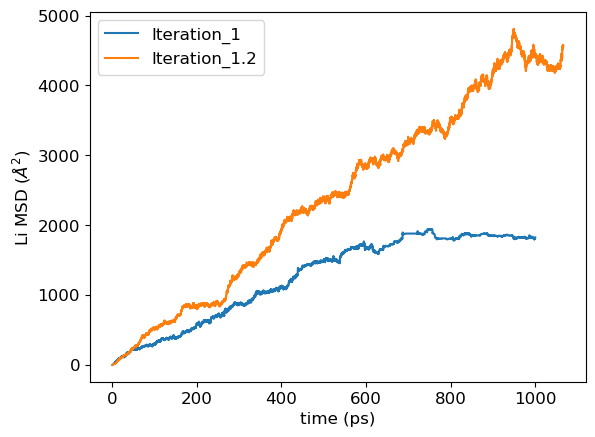

In [52]:
# Loading in lammps log file of iteration_1
lammps_dump_directory = 'simulations/MD_1/'
log = LogReader(lammps_dump_directory+'log.lammps')
print(log.get_header_names())

temperature = log.get_header('Temp')
msd_1 = log.get_header('c_1[4]')

plt.rcParams.update({'font.size': 12, 'axes.labelsize': 12})

# Plotting temperature
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(temperature)) * 1.e-1, temperature, '+', label='Main Data')
plt.xlabel('time (ps)')
plt.ylabel('Temperature (K)')
left, bottom, width, height = [0.25, 0.5, 0.4, 0.3]
ax_inset = plt.axes([left, bottom, width, height])
ax_inset.plot(np.arange(len(temperature[:4000])) * 1.e-1, temperature[:4000], '-')
ax_inset.set_xlabel('time (ps)')
ax_inset.set_ylabel('Temperature (K)')
plt.show()

# Loading in lammps log file of iteration_1_2
lammps_dump_directory = 'simulations/MD_1_2/'
log = LogReader(lammps_dump_directory+'log.lammps')

temperature = log.get_header('Temp')
msd_1_2 = log.get_header('c_1[4]')

# Plotting temperature
plt.plot(np.arange(len(temperature[:10000])) * 1.e-1, temperature[:10000], '-')
plt.xlabel('time (ps)')
plt.ylabel('Temperature (K)')
plt.show()

# Plotting mean square displacement
plt.plot(np.arange(len(msd_1)) * 1.e-1, msd_1, '-', label='Iteration_1')
plt.plot(np.arange(len(msd_1_2)) * 1.e-1, msd_1_2, '-', label='Iteration_1.2')
plt.xlabel('time (ps)')
plt.ylabel(r'Li MSD ($\AA^{2}$)')
plt.legend()
plt.show()